In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Markdown
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier

# Introduction

Daytime fatigue—frequent feelings of tiredness or low energy during waking hours—is an increasingly significant public health concern due to its impact on productivity, daily functioning, and overall well-being. Modern lifestyle factors, especially sleep behaviors, play a key role in this issue. In particular, nighttime electronic device use has been strongly linked to poor sleep outcomes and greater daytime tiredness. For instance, cell phone use before bed is associated with longer sleep latency and reduced sleep quality [@joshi2022nighttime]. Moreover, recent evidence suggests that screen use before lights off not only worsens sleep quality but also increases insomnia severity, while certain activities such as music listening may actually reduce daytime sleepiness [@chen2024when].

Psychological factors, including perceived stress, can further exacerbate the negative impact of poor sleep habits, leading to greater fatigue. Stress may also interact with sleep-related behaviors, amplifying their effects on daytime functioning. Understanding these interactions is essential for designing effective interventions to improve sleep hygiene and reduce fatigue.

While social media is often thought to exacerbate stress, emerging evidence paints a more nuanced picture. For example, Oppenheimer and colleagues found that short (20-minute) sessions of social media browsing did not elevate heart rate or cortisol levels, in fact, both decreased—indicating a potential calming effect of typical usage [@oppenheimer2024].

The present study examines the relationship between pre-bedtime screen use and daytime tiredness frequency in adults, with a focus on the moderating role of stress. I hypothesize that higher screen use before sleep will be associated with greater daytime fatigue, especially among individuals with higher stress levels. Additional sleep behaviors and demographic variables are controlled to clarify these relationships. This investigation aims to provide practical insights for reducing fatigue and promoting better sleep and daytime functioning.

## Research Questions

Do individuals who report more frequent screen use before bedtime experience higher levels of daytime tiredness frequency?

Does stress level moderate the relationship between screen use before bedtime and daytime tiredness frequency?

### Hypotheses

**Null Hypothesis (H0):** There is no association between screen use before bedtime and daytime tiredness frequency.

**Alternative Hypothesis (H1):** Higher screen use before bedtime is associated with increased daytime tiredness frequency. Additionally, this association is stronger among individuals with higher stress levels.

### Dependent Outcome Variable

The primary dependent variable in this study is **daytime tiredness frequency**, which measures how often participants feel tired or low energy during the day. This variable is assessed on a 5-point ordinal scale, with higher scores indicating more frequent daytime tiredness.

### Independent Variable

The main independent variable is **screen use before bedtime**, which captures how often participants use a phone, computer, or TV within one hour before going to sleep. This variable is also measured on a 5-point ordinal scale, with higher values indicating more frequent screen use.

### Moderator Variable

**Stress level** is examined as a potential moderator of the relationship between screen use before bedtime and daytime tiredness frequency. Stress is operationalized as a composite score combining general perceived stress, frequency of feeling overwhelmed, sleep-related worry, feelings of guilt when tired. Higher composite scores indicate higher overall stress.


### Control Variables

To account for alternative explanations and reduce potential confounding, several control variables were included in the analyses. Sleep behavior-related controls consisted of usual weekday bedtime, average number of sleep hours on weekday nights, consistency in sleep and wake times, daily caffeine consumption, frequency of daytime napping, level of perceived social support, and frequency of sleep aid use. In addition, demographic characteristics, including age, gender, and ethnicity, were included as control variables to further isolate the unique contribution of screen use and stress to daytime tiredness frequency.


## Methods

### Data Preparation

Data from the fatigue survey and demographic data from Prolific were merged using participant IDs to ensure that only complete cases were included. After merging, columns were renamed for clarity, and only variables relevant to fatigue analysis were retained. Missing data patterns were inspected using a heatmap to identify potential issues before analysis.

### Design

The survey included questions measuring screen use before bedtime, daytime tiredness, stress-related feelings (perceived stress, overwhelm, sleep worry, guilt when tired), sleep habits (bedtime consistency, sleep duration, nap frequency, caffeine intake), and demographic factors (age, gender, ethnicity). Most items used 5-point ordinal scales, while some included open-ended responses or multi-select options. This design allowed for a comprehensive assessment of behavioral and psychological contributors to daytime fatigue.

### Analysis Plan

I conducted exploratory data analysis (EDA) to examine distributions and relationships among variables. The primary analysis involved fitting a multiple linear regression model to predict daytime tiredness frequency, with screen use before bedtime as the main independent variable and stress level as a moderator (through an interaction term). Control variables included sleep behavior factors (e.g., sleep duration, bedtime consistency, nap frequency) and demographic variables (e.g., age, gender, ethnicity). Additionally, a random forest model was used to explore and compare feature importance across predictors.

The model can be conceptually described as:

Fatigue ~ ScreenUse + Stress + ScreenUse × Stress + SleepControls + Demographics


# Data + Exploratory Data Anslysis
## Data

In [75]:
#| label: tbl-demo-preview
#| tbl-cap: "Preview of the first five rows from the Prolific demographic data."
#| tbl-num: true

# Load data and perform initial filtering
df_demo =  pd.read_csv('prolific_demograpgh.csv')
df_demo.head(5)

,Submission id,Participant id,Status,Custom study tncs accepted at,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,...,Fluent languages,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,685c6bfc6383a4d7e2d8c362,678f6e1f6a3d68ee8c1533f5,APPROVED,Not Applicable,2025-06-25T21:37:05.666000Z,2025-06-25T21:39:19.081000Z,2025-06-26T19:05:01.519000Z,2025-06-25T21:39:19.607898Z,134.0,C105F160,...,English,27,Female,White,United States,United States,United States,English,Yes,Unemployed (and job seeking)
1,685c6c0e8639b6770d91de11,68424cb9741b5d29c8a6e13c,APPROVED,Not Applicable,2025-06-25T21:37:26.455000Z,2025-06-25T21:40:14.660000Z,2025-06-26T19:05:01.797000Z,2025-06-25T21:40:15.247280Z,169.0,C105F160,...,English,37,Male,Black,United States,United States,United States,English,No,Part-Time
2,685c6c15aef3e22df084a3e9,663e26ccdbc470527165388b,APPROVED,Not Applicable,2025-06-25T21:37:29.654000Z,2025-06-25T21:39:52.898000Z,2025-06-26T19:05:02.393000Z,2025-06-25T21:39:53.344949Z,144.0,C105F160,...,English,57,Female,White,United States,United States,United States,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
3,685c6c1e2950200dc767306a,5bf4afe0b8e9f800014c9c0b,APPROVED,Not Applicable,2025-06-25T21:37:37.492000Z,2025-06-25T21:39:02.953000Z,2025-06-26T19:05:02.875000Z,2025-06-25T21:39:03.427990Z,86.0,C105F160,...,English,50,Male,White,United States,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED
4,685c6c256528a3dd7a7e6364,68389c9ebaae4590903d80c5,APPROVED,Not Applicable,2025-06-25T21:37:51.190000Z,2025-06-25T21:41:54.302000Z,2025-06-26T19:05:03.129000Z,2025-06-25T21:41:54.826067Z,244.0,C105F160,...,"English, French",24,Male,Black,United States,United States,United States,English,Yes,Part-Time


In [76]:
#| label: tbl-fatigue-preview
#| tbl-cap: "Preview of the first five rows from the raw fatigue survey data."
#| tbl-num: true

df_fatigue_num = pd.read_csv('fatigue num.csv')
df_fatigue_num.head(5)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q15,Q16,Q17,Q18,Q19,Q19_7_TEXT,Q20,Q21,Q22,Q22_6_TEXT
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,14. Do you currently take any medications or s...,15. I believe I can “catch up” on missed sleep...,16. I worry a lot about not getting enough sleep.,17. I feel guilty or frustrated when I’m tired...,18. What do you think are the biggest causes o...,18. What do you think are the biggest causes o...,19. What is your age?,20. What is your gender?,21. what is your race? - Selected Choice,21. what is your race? - Some Other Race: - Text
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID15""}","{""ImportId"":""QID16""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID19_7_TEXT""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID22""}","{""ImportId"":""QID22_6_TEXT""}"
2,2025-06-25 13:55:33,2025-06-25 14:47:27,0,72.33.2.168,100,3113,1,2025-06-25 14:47:28,R_5qrqoxPWkpfaa3L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-25 14:48:36,2025-06-25 14:50:51,0,72.33.2.239,100,134,1,2025-06-25 14:50:51,R_1HYrNS5SOnUsJUd,NaN,...,2,2,5,5,7,circadian rhythm and potential sleep apnea,3,2,3,NaN
4,2025-06-25 14:52:28,2025-06-25 14:55:29,0,72.33.2.167,100,180,1,2025-06-25 14:55:29,R_1mf1Z3wMzDCx5uQ,NaN,...,2,4,2,3,4,NaN,2,2,3,NaN


In [77]:
#| label: tbl-merged-data-preview
#| tbl-cap: "Preview of the merged dataset combining fatigue responses and demographic data (first five rows)."
#| tbl-num: true

# merge two datasets and keep only rows that are present in both datasets
df_new = pd.merge(
    df_fatigue_num,
    df_demo,
    left_on='Q1',
    right_on='Participant id',
    how='inner'  
)

# Check result
print(df_new.shape)
df_new.head(5)

(65, 62)


,StartDate,EndDate,Status_x,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Fluent languages,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,2025-06-25 15:37:38,2025-06-25 15:38:50,0,172.220.80.202,100,71,1,2025-06-25 15:38:50,R_71Qr9CX2OA3JFal,NaN,...,English,50,Male,White,United States,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED
1,2025-06-25 15:38:01,2025-06-25 15:39:03,0,170.85.131.10,100,61,1,2025-06-25 15:39:04,R_5vjP1M0ljYnw1Ll,NaN,...,English,36,Female,White,United States,United States,United States,English,No,Full-Time
2,2025-06-25 15:37:07,2025-06-25 15:39:07,0,107.4.78.143,100,120,1,2025-06-25 15:39:07,R_1q1YeGHwHlWKMMc,NaN,...,English,27,Female,White,United States,United States,United States,English,Yes,Unemployed (and job seeking)
3,2025-06-25 15:37:31,2025-06-25 15:39:37,0,71.68.0.60,100,126,1,2025-06-25 15:39:37,R_1OZRNCvBf4e8JON,NaN,...,English,57,Female,White,United States,United States,United States,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
4,2025-06-25 15:38:06,2025-06-25 15:39:47,0,98.230.211.85,100,100,1,2025-06-25 15:39:47,R_5q2U0cYammxrz2L,NaN,...,English,72,Female,White,United States,United States,United States,English,DATA_EXPIRED,Part-Time


This dataset combines survey responses on fatigue and demographic information collected from Prolific participants. It includes 62 columns capturing metadata (e.g., StartDate, EndDate, IPAddress, ResponseId), survey progress and timing information (e.g., Progress, Duration), self-reported demographic variables (e.g., Age, Sex, Ethnicity, Country of birth, Nationality), language proficiency, and employment/student status. The fatigue responses are linked using participant IDs, allowing for integrated analysis of behavioral, psychological, and demographic predictors of daytime tiredness.


In [79]:
# Prpare a dictionary to rename slected columns
rename_dict = {
      'Q1': 'participant_id',
    'Q2': 'weekday_bedtime',
    'Q3': 'weekday_sleep_hours',
    'Q4': 'screen_use_before_bed',
    'Q5': 'sleep_schedule_consistency',
    'Q6': 'caffeine_daily',
    'Q7': 'daytime_tired_frequency',
    'Q8': 'nap_frequency',
    'Q9': 'tired_daytime_response',
    'Q10': 'fatigue_interference',
    'Q11': 'stress_level',
    'Q12': 'overwhelm_frequency',
    'Q13': 'social_support',
    'Q14': 'weekly_work_hours',
    'Q15': 'sleep_aid_use',
    'Q16': 'catch_up_sleep_belief',
    'Q17': 'sleep_worry',
    'Q18': 'tired_guilt',
    'Q19': 'tiredness_causes',
    'Q19_7_TEXT': 'tiredness_other_text',
    'Q21': 'gender',
    'Q22': 'race',
    'Q22_6_TEXT': 'race_other_text',
    'Ethnicity simplified': 'ethnicity',
    'Nationality': 'nationality',
    'Employment status': 'emp_status',
    'Age': 'age'}

# Apply the rename map to the existing columns
df_new.rename(columns=rename_dict, inplace=True)


In [80]:
# Create a list of columns to keep
cols_to_keep = [
    'participant_id', 'weekday_bedtime', 'weekday_sleep_hours', 
    'screen_use_before_bed', 'sleep_schedule_consistency', 
    'caffeine_daily', 'daytime_tired_frequency', 'nap_frequency', 
    'tired_daytime_response', 'fatigue_interference', 'stress_level', 
    'overwhelm_frequency', 'social_support', 'weekly_work_hours', 
    'sleep_aid_use', 'catch_up_sleep_belief', 'sleep_worry', 
    'tired_guilt', 'tiredness_causes', 'tiredness_other_text', 
    'age', 'gender', 'ethnicity', 
    'nationality', 'emp_status'
]
final_df = df_new[cols_to_keep].copy()

# Check
print(final_df.columns)
final_df.head()

Index(['participant_id', 'weekday_bedtime', 'weekday_sleep_hours',
       'screen_use_before_bed', 'sleep_schedule_consistency', 'caffeine_daily',
       'daytime_tired_frequency', 'nap_frequency', 'tired_daytime_response',
       'fatigue_interference', 'stress_level', 'overwhelm_frequency',
       'social_support', 'weekly_work_hours', 'sleep_aid_use',
       'catch_up_sleep_belief', 'sleep_worry', 'tired_guilt',
       'tiredness_causes', 'tiredness_other_text', 'age', 'gender',
       'ethnicity', 'nationality', 'emp_status'],
      dtype='object')


,participant_id,weekday_bedtime,weekday_sleep_hours,screen_use_before_bed,sleep_schedule_consistency,caffeine_daily,daytime_tired_frequency,nap_frequency,tired_daytime_response,fatigue_interference,...,catch_up_sleep_belief,sleep_worry,tired_guilt,tiredness_causes,tiredness_other_text,age,gender,ethnicity,nationality,emp_status
0,5bf4afe0b8e9f800014c9c0b,2,4,5,5,3,3,2,1,3,...,4,2,4,4,NaN,50,1,White,United States,DATA_EXPIRED
1,6564945a98aa29adc95a4672,3,1,2,4,3,3,2,3,2,...,4,4,1,1,NaN,36,2,White,United States,Full-Time
2,678f6e1f6a3d68ee8c1533f5,4,2,5,1,2,4,1,"2,3,5",NaN,...,3,4,4,2,NaN,27,1,White,United States,Unemployed (and job seeking)
3,663e26ccdbc470527165388b,3,3,4,5,1,3,1,3,2,...,3,3,2,2,NaN,57,2,White,United States,"Not in paid work (e.g. homemaker', 'retired or..."
4,62897d2024f826ea90b7efa1,2,3,4,4,2,3,1,3,2,...,2,4,4,2,NaN,72,2,White,United States,Part-Time


In Question 19, participants were asked to indicate possible causes of their daytime tiredness and were also given the option to provide an open-ended response. In this step, I integrated similar open-ended reasons and created a new category labeled "illness," while grouping all remaining responses under "other" to simplify the data for analysis.

In [82]:
final_df['tiredness_other_text'].fillna('NO INPUT').value_counts()

tiredness_other_text
NO INPUT                         56
I have cancer                     1
tiring job                        1
Marijuana use                     1
Getting older                     1
I really have no idea: habit?     1
underactive thyroid               1
hormones                          1
Insomnia                          1
chronic illness                   1
Name: count, dtype: int64

In [83]:
final_df['tiredness_other_text'] = final_df['tiredness_other_text'].fillna('NO INPUT')

# Define text mapping for grouping open-ended responses
text_mapping = {
    'I have cancer': 'illness',
    'chronic illness': 'illness',
    'underactive thyroid': 'illness',
    'Insomnia': 'illness',
    'Marijuana use': 'other',
    'tiring job': 'other',
    'Getting older': 'other',
    'I really have no idea: habit?': 'other',
    'hormones': 'illness'
}

# Only replace if not 'NO INPUT'
final_df.loc[
    final_df['tiredness_other_text'] != 'NO INPUT',
    'tiredness_other_text'
] = final_df.loc[
    final_df['tiredness_other_text'] != 'NO INPUT',
    'tiredness_other_text'
].replace(text_mapping)


print(final_df['tiredness_other_text'].value_counts())


tiredness_other_text
NO INPUT    56
illness      5
other        4
Name: count, dtype: int64


In [84]:
# Create mask
mask = final_df['tiredness_causes'] == 'NO INPUT'

# Replace with text from tiredness_other_text
final_df.loc[mask, 'tiredness_causes'] = final_df.loc[mask, 'tiredness_other_text']

# Drop tiredness_other_text
final_df.drop(columns=['tiredness_other_text'], inplace=True)

Here is the data dictionary of the data after I merge the two data and filtered out the columns I do not use 

In [86]:
#| label: tbl-data-dictionary
#| tbl-cap: "Data dictionary summarizing all key survey and demographic variables used in this analysis."
#| tbl-num: true

# Define data dictionary as a list of dicts
data_dict = [
    {'Variable': 'participant_id', 'Type': 'ID', 'Description': 'Unique participant identifier'},
    {'Variable': 'weekday_bedtime', 'Type': 'Ordinal', 'Description': 'Usual bedtime on weekdays (1 = early, 5 = very late)'},
    {'Variable': 'weekday_sleep_hours', 'Type': 'Ordinal', 'Description': 'Average weekday sleep hours (1 = <5 hrs, 5 = >8 hrs)'},
    {'Variable': 'screen_use_before_bed', 'Type': 'Ordinal', 'Description': 'Screen use before bed (1 = Never, 5 = Always)'},
    {'Variable': 'sleep_schedule_consistency', 'Type': 'Ordinal', 'Description': 'Sleep schedule consistency (1 = Very inconsistent, 5 = Very consistent)'},
    {'Variable': 'caffeine_daily', 'Type': 'Ordinal', 'Description': 'Daily caffeinated drinks (1 = 0, 5 = 4+)'},
    {'Variable': 'daytime_tired_frequency', 'Type': 'Ordinal', 'Description': 'Daytime tiredness frequency (1 = Never, 5 = Always)'},
    {'Variable': 'nap_frequency', 'Type': 'Ordinal', 'Description': 'Daytime nap frequency (1 = Never, 4 = Almost daily)'},
    {'Variable': 'tired_daytime_response', 'Type': 'Nominal (multi)', 'Description': 'Actions when extremely tired (multi-select)'},
    {'Variable': 'fatigue_interference', 'Type': 'Ordinal', 'Description': 'Fatigue interference with daily activities (1 = Not at all, 5 = Extremely)'},
    {'Variable': 'stress_level', 'Type': 'Ordinal', 'Description': 'Perceived stress level (1 = Not at all, 5 = Extremely)'},
    {'Variable': 'overwhelm_frequency', 'Type': 'Ordinal', 'Description': 'Feeling overwhelmed frequency (1 = Never, 5 = Always)'},
    {'Variable': 'social_support', 'Type': 'Ordinal', 'Description': 'Perceived social support (1 = Not at all, 5 = Very supported)'},
    {'Variable': 'weekly_work_hours', 'Type': 'Ordinal', 'Description': 'Weekly work hours (1 = None, 6 = 40+ hours)'},
    {'Variable': 'sleep_aid_use', 'Type': 'Nominal', 'Description': 'Sleep/energy aid use (1 = Yes, 2 = No, 3 = Prefer not to say)'},
    {'Variable': 'catch_up_sleep_belief', 'Type': 'Ordinal', 'Description': 'Belief in catching up on sleep (1 = Strongly disagree, 5 = Strongly agree)'},
    {'Variable': 'sleep_worry', 'Type': 'Ordinal', 'Description': 'Worry about not getting enough sleep (1 = Strongly disagree, 5 = Strongly agree)'},
    {'Variable': 'tired_guilt', 'Type': 'Ordinal', 'Description': 'Guilt when tired (1 = Strongly disagree, 5 = Strongly agree)'},
    {'Variable': 'tiredness_causes', 'Type': 'Nominal (multi)', 'Description': 'Perceived causes of tiredness (multi-select)'},
    {'Variable': 'age', 'Type': 'Continuous', 'Description': 'Age in years'},
    {'Variable': 'gender', 'Type': 'Nominal', 'Description': 'Gender (male, female, other)'},
    {'Variable': 'ethnicity', 'Type': 'Nominal', 'Description': 'Ethnic identity'},
    {'Variable': 'nationality', 'Type': 'Nominal', 'Description': 'Nationality'},
    {'Variable': 'emp_status', 'Type': 'Nominal', 'Description': 'Employment status'},
    {'Variable': 'sleep_aid_c', 'Type': 'Numeric centered', 'Description': 'Sleep aid centered code (0.5 = yes, -0.5 = no, 0 = prefer no answer)'}
]

# Convert to DataFrame
df_dict = pd.DataFrame(data_dict)

# Convert to markdown string
df_codebook = Markdown(df_dict.to_markdown())

df_codebook


|    | Variable                   | Type             | Description                                                                      |
|---:|:---------------------------|:-----------------|:---------------------------------------------------------------------------------|
|  0 | participant_id             | ID               | Unique participant identifier                                                    |
|  1 | weekday_bedtime            | Ordinal          | Usual bedtime on weekdays (1 = early, 5 = very late)                             |
|  2 | weekday_sleep_hours        | Ordinal          | Average weekday sleep hours (1 = <5 hrs, 5 = >8 hrs)                             |
|  3 | screen_use_before_bed      | Ordinal          | Screen use before bed (1 = Never, 5 = Always)                                    |
|  4 | sleep_schedule_consistency | Ordinal          | Sleep schedule consistency (1 = Very inconsistent, 5 = Very consistent)          |
|  5 | caffeine_daily             | Ordinal          | Daily caffeinated drinks (1 = 0, 5 = 4+)                                         |
|  6 | daytime_tired_frequency    | Ordinal          | Daytime tiredness frequency (1 = Never, 5 = Always)                              |
|  7 | nap_frequency              | Ordinal          | Daytime nap frequency (1 = Never, 4 = Almost daily)                              |
|  8 | tired_daytime_response     | Nominal (multi)  | Actions when extremely tired (multi-select)                                      |
|  9 | fatigue_interference       | Ordinal          | Fatigue interference with daily activities (1 = Not at all, 5 = Extremely)       |
| 10 | stress_level               | Ordinal          | Perceived stress level (1 = Not at all, 5 = Extremely)                           |
| 11 | overwhelm_frequency        | Ordinal          | Feeling overwhelmed frequency (1 = Never, 5 = Always)                            |
| 12 | social_support             | Ordinal          | Perceived social support (1 = Not at all, 5 = Very supported)                    |
| 13 | weekly_work_hours          | Ordinal          | Weekly work hours (1 = None, 6 = 40+ hours)                                      |
| 14 | sleep_aid_use              | Nominal          | Sleep/energy aid use (1 = Yes, 2 = No, 3 = Prefer not to say)                    |
| 15 | catch_up_sleep_belief      | Ordinal          | Belief in catching up on sleep (1 = Strongly disagree, 5 = Strongly agree)       |
| 16 | sleep_worry                | Ordinal          | Worry about not getting enough sleep (1 = Strongly disagree, 5 = Strongly agree) |
| 17 | tired_guilt                | Ordinal          | Guilt when tired (1 = Strongly disagree, 5 = Strongly agree)                     |
| 18 | tiredness_causes           | Nominal (multi)  | Perceived causes of tiredness (multi-select)                                     |
| 19 | age                        | Continuous       | Age in years                                                                     |
| 20 | gender                     | Nominal          | Gender (male, female, other)                                                     |
| 21 | ethnicity                  | Nominal          | Ethnic identity                                                                  |
| 22 | nationality                | Nominal          | Nationality                                                                      |
| 23 | emp_status                 | Nominal          | Employment status                                                                |
| 24 | sleep_aid_c                | Numeric centered | Sleep aid centered code (0.5 = yes, -0.5 = no, 0 = prefer no answer)             |

@tbl-data-dictionary summarizes all variables included in the present study, detailing their type and operational definitions. The dataset comprises a unique participant identifier, key outcome and predictor measures, and several covariates to control for potential confounding effects. Daytime tiredness frequency serves as the primary dependent variable, assessed on a 5-point ordinal scale. The main independent variable, screen use before bed, is similarly measured on a 5-point ordinal scale to capture habitual evening screen exposure. Stress-related variables, including perceived stress level, frequency of feeling overwhelmed, sleep-related worry, beliefs about catching up on sleep, and feelings of guilt when tired, are included to operationalize psychological moderators. Additional sleep behavior variables such as weekday bedtime, average weekday sleep hours, sleep schedule consistency, caffeine consumption, nap frequency, social support, and sleep aid use provide detailed context regarding individual sleep patterns. Demographic characteristics (age, gender, ethnicity, nationality, and employment status) are included to adjust for background differences across participants. Finally, exploratory variables such as actions when extremely tired, fatigue interference with daily activities, and perceived causes of tiredness offer further insight into individual coping strategies and perceptions of fatigue. This comprehensive set of variables enables a robust investigation of behavioral, psychological, and demographic factors associated with daytime tiredness.

In [88]:
final_df.describe()

,participant_id,weekday_bedtime,weekday_sleep_hours,screen_use_before_bed,sleep_schedule_consistency,caffeine_daily,daytime_tired_frequency,nap_frequency,tired_daytime_response,fatigue_interference,...,sleep_aid_use,catch_up_sleep_belief,sleep_worry,tired_guilt,tiredness_causes,age,gender,ethnicity,nationality,emp_status
count,65,65,64,65,65,65,65,65,64,64,...,65,65,65,65,65,65,65,65,65,65
unique,65,5,5,4,5,5,4,4,22,5,...,2,5,5,5,6,36,2,5,6,6
top,5bf4afe0b8e9f800014c9c0b,2,3,4,4,2,3,2,3,2,...,2,4,4,4,6,50,2,White,United States,Full-Time
freq,1,27,27,28,26,24,44,28,15,36,...,54,25,25,26,15,4,40,42,56,27


In [89]:
# Convert all object columns that look numeric to integers
for col in final_df.columns:
    if final_df[col].dtype == 'object':
        # Try to coerce to numeric
        final_df[col] = pd.to_numeric(final_df[col], errors='ignore')

final_df.dtypes



/var/folders/3x/rt2kj8w160ndt76k0rh99dlm0000gn/T/ipykernel_63422/3897208350.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  final_df[col] = pd.to_numeric(final_df[col], errors='ignore')


participant_id                 object
weekday_bedtime                 int64
weekday_sleep_hours           float64
screen_use_before_bed           int64
sleep_schedule_consistency      int64
caffeine_daily                  int64
daytime_tired_frequency         int64
nap_frequency                   int64
tired_daytime_response         object
fatigue_interference          float64
stress_level                    int64
overwhelm_frequency             int64
social_support                  int64
weekly_work_hours               int64
sleep_aid_use                   int64
catch_up_sleep_belief           int64
sleep_worry                     int64
tired_guilt                     int64
tiredness_causes                int64
age                             int64
gender                          int64
ethnicity                      object
nationality                    object
emp_status                     object
dtype: object

In [90]:
num = final_df.select_dtypes('number')

stats = num.describe().T         
stats['missing'] = num.isna().sum()
stats = stats[['count','missing','mean','std','min','50%','max']].round(2)
stats


,count,missing,mean,std,min,50%,max
weekday_bedtime,65.0,0,2.60,0.90,1.0,3.0,5.0
weekday_sleep_hours,64.0,1,2.97,0.91,1.0,3.0,5.0
screen_use_before_bed,65.0,0,3.98,1.02,2.0,4.0,5.0
sleep_schedule_consistency,65.0,0,3.42,1.22,1.0,4.0,5.0
caffeine_daily,65.0,0,2.71,1.10,1.0,3.0,5.0
daytime_tired_frequency,65.0,0,3.06,0.68,2.0,3.0,5.0
nap_frequency,65.0,0,1.88,0.89,1.0,2.0,4.0
fatigue_interference,64.0,1,2.20,0.76,1.0,2.0,5.0
stress_level,65.0,0,2.42,1.12,1.0,2.0,5.0
overwhelm_frequency,65.0,0,2.77,0.95,1.0,3.0,5.0


This generates a summary statistics table for all numeric variables in the dataset, including both descriptive statistics and information on missing values.

## Exploratory data analysis (EDA)

<Axes: >

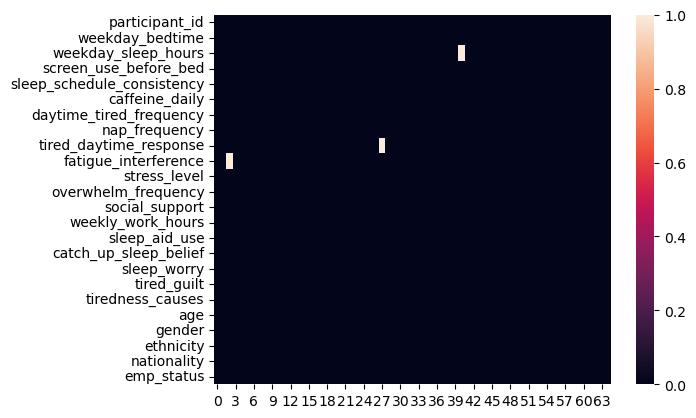

In [93]:
#| label: fig-missing-heatmap
#| fig-cap: "Heatmap of missing values across variables in the final dataset."


# Inspect for missing observations
sns.heatmap(final_df.isnull().transpose())

@fig-missing-heatmap displays the missing data pattern for all variables included in the study. Most cells are dark, indicating complete data, with only a few light cells showing minimal missingness. It shows that the 3 variables 'weekday_sleep_hours', 'tired_daytime_response' and 'fatigue_interference', each has a missing value. The sparse missingness suggests that the dataset is largely complete and reliable. Compared to typical survey data, this dataset shows very low missingness. This enhances the validity of analyses without needing extensive data imputation. 


In [95]:
final_df.isnull().sum()

participant_id                0
weekday_bedtime               0
weekday_sleep_hours           1
screen_use_before_bed         0
sleep_schedule_consistency    0
caffeine_daily                0
daytime_tired_frequency       0
nap_frequency                 0
tired_daytime_response        1
fatigue_interference          1
stress_level                  0
overwhelm_frequency           0
social_support                0
weekly_work_hours             0
sleep_aid_use                 0
catch_up_sleep_belief         0
sleep_worry                   0
tired_guilt                   0
tiredness_causes              0
age                           0
gender                        0
ethnicity                     0
nationality                   0
emp_status                    0
dtype: int64

Missing values in ordinal variables (weekday sleep hours and fatigue interference) were imputed using median values to preserve the ordinal nature of the data. For the nominal variable tired daytime response, the single missing case was excluded from analyses involving that variable. Given the minimal amount of missingness overall, these procedures ensured the integrity of the analytic sample without substantially affecting statistical power.

In [97]:
# List of ordinal columns to convert
ordinal_cols = [
    'weekday_bedtime',
    'weekday_sleep_hours',
    'screen_use_before_bed',
    'sleep_schedule_consistency',
    'caffeine_daily',
    'daytime_tired_frequency',
    'nap_frequency',
    'fatigue_interference',
    'social_support',
    'weekly_work_hours',
    'catch_up_sleep_belief',
    'age'  # if coded numerically
]

# Convert each to numeric
for col in ordinal_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')


In [98]:
# Convert columns to numeric first (errors='coerce' converts any non-numeric to NaN)
final_df['weekday_sleep_hours'] = pd.to_numeric(final_df['weekday_sleep_hours'], errors='coerce')
final_df['fatigue_interference'] = pd.to_numeric(final_df['fatigue_interference'], errors='coerce')

# Then compute median and impute
median_sleep_hours = final_df['weekday_sleep_hours'].median()
final_df['weekday_sleep_hours'] = final_df['weekday_sleep_hours'].fillna(median_sleep_hours)

median_fatigue_interference = final_df['fatigue_interference'].median()
final_df['fatigue_interference'] = final_df['fatigue_interference'].fillna(median_fatigue_interference)

# Drop row with missing tired_daytime_response
final_df = final_df.dropna(subset=['tired_daytime_response'])


In [99]:
bedtime_dict = {
    '1': 'bedtime_before9',
    '2': 'bedtime_9_11',
    '3': 'bedtime_11_1',
    '4': 'bedtime_1_3',
    '5': 'bedtime_after3'
}

# Apply renaming
final_df.rename(columns=bedtime_dict, inplace=True)

In [100]:
# Create bedtime dummies
bedtime_dummies = pd.get_dummies(final_df['weekday_bedtime'], prefix='bedtime')

rename_bedtime = {
    'bedtime_1': 'before_9',
    'bedtime_2': 'bedtime_9_11',
    'bedtime_3': 'bedtime_11_1',
    'bedtime_4': 'bedtime_1_3',
    'bedtime_5': 'bedtime_after3'
}
bedtime_dummies.rename(columns=rename_bedtime, inplace=True)

# Create sleep hours dummies
sleep_dummies = pd.get_dummies(final_df['weekday_sleep_hours'], prefix='sleep_hours')

rename_sleep_hours = {
    'sleep_hours_1': 'sleep_lt5',
    'sleep_hours_2': 'sleep_5_6',
    'sleep_hours_3': 'sleep_6_7',
    'sleep_hours_4': 'sleep_7_8',
    'sleep_hours_5': 'sleep_gt8'
}
sleep_dummies.rename(columns=rename_sleep_hours, inplace=True)

# Merge with original DataFrame
final_df = pd.concat([final_df, bedtime_dummies, sleep_dummies], axis=1)

# Sleep aid: centered coding
final_df['sleep_aid_use'] = final_df['sleep_aid_use'].astype(int)

final_df['sleep_aid_c'] = final_df['sleep_aid_use'].replace({
    1: 0.5,
    2: -0.5,
    3: 0
})


# Q9: tired actions (multi-select, split first)
q9_mapping = {
    '1': 'nap',
    '2': 'caffeine',
    '3': 'push_through',
    '4': 'cancel_plans',
    '5': 'relax'
}
final_df['tired_daytime_response'] = final_df['tired_daytime_response'].astype(str).str.split(',')
final_df['tired_daytime_response'] = final_df['tired_daytime_response'].apply(lambda x: [q9_mapping.get(i.strip(), i.strip()) for i in x])
final_df['tired_daytime_response'] = final_df['tired_daytime_response'].apply(lambda x: ','.join(x))


# Q19: tiredness causes (multi-select, split first)
q19_mapping = {
    '1': 'poor_sleep',
    '2': 'stress',
    '3': 'diet',
    '4': 'no_exercise',
    '5': 'mood',
    '6': 'overworking',
    '7': 'other'
}
final_df['tiredness_causes'] = final_df['tiredness_causes'].astype(str).str.split(',')
final_df['tiredness_causes'] = final_df['tiredness_causes'].apply(lambda x: [q19_mapping.get(i.strip(), i.strip()) for i in x])
final_df['tiredness_causes'] = final_df['tiredness_causes'].apply(lambda x: ','.join(x))

In [101]:
# Create a rename dictionary
rename_dummies = {
    'bedtime_1': 'bedtime_before9',
    'bedtime_2': 'bedtime_9_11',
    'bedtime_3': 'bedtime_11_1',
    'bedtime_4': 'bedtime_1_3',
    'bedtime_5': 'bedtime_after3',
    
    'sleep_hours_1': 'sleep_<5',
    'sleep_hours_2': 'sleep_5_6',
    'sleep_hours_3': 'sleep_6_7',
    'sleep_hours_4': 'sleep_7_8',
    'sleep_hours_5': 'sleep_>8'
}

# Apply renaming
final_df.rename(columns=rename_dummies, inplace=True)


## Inspecting Outcome Variables

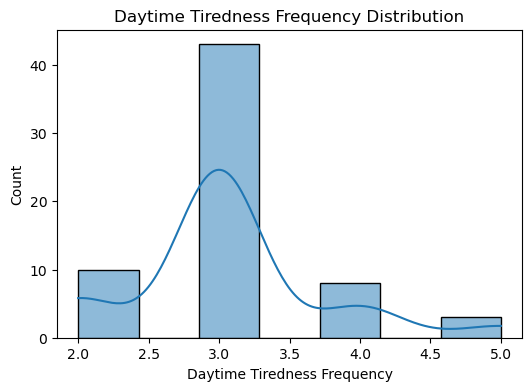

In [103]:
#| label: fig-outcome
#| fig-cap: "Histogram distribution of daytime tiredness frequency."


import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

sns.histplot(
    data=final_df, 
    x='daytime_tired_frequency', 
    kde=True, ax=ax
)

ax.set_title("Daytime Tiredness Frequency Distribution")
ax.set_xlabel("Daytime Tiredness Frequency")
ax.set_ylabel("Count")
plt.show()

@fig-outcome displays the distribution of self-reported screen use frequency before bedtime. The majority of participants reported relatively high levels of screen use, with most individuals selecting categories 4 ("often") and 5 ("always"). In contrast, fewer participants reported low screen use frequencies (categories 2 or 3). This pattern suggests that nighttime screen use is a common behavior in the sample.


## Inspecting Independent Variables

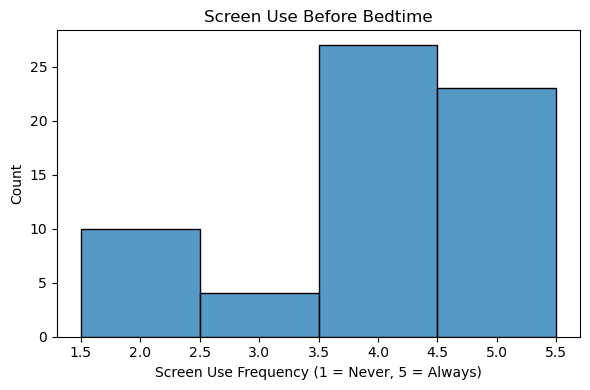

In [106]:
#| label: fig-independent
#| fig-cap: "Histogram distributions of screen use before bedtime (left) and stress composite score (right)."

fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=final_df,
    x='screen_use_before_bed',
    discrete=True,
    ax=ax
)
ax.set_title("Screen Use Before Bedtime")
ax.set_xlabel("Screen Use Frequency (1 = Never, 5 = Always)")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


@fig-independent shows the distribution of daytime tiredness frequency. Responses are centered around the midrange category (3), indicating that most participants experience moderate levels of daytime tiredness. A smaller proportion of participants reported either very low or very high tiredness frequencies.


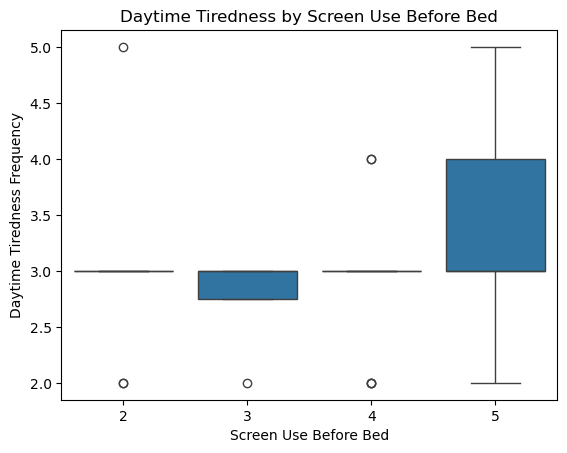

In [108]:
#| label: fig-tiredness-by-screen
#| fig-cap: "Boxplot showing the relationship between screen use before bed and daytime tiredness frequency."
#| fig-num: true



# Boxplot to examine relationship between screen use and daytime tiredness
sns.boxplot(x='screen_use_before_bed', y='daytime_tired_frequency', data=final_df)
plt.title("Daytime Tiredness by Screen Use Before Bed")
plt.xlabel("Screen Use Before Bed")
plt.ylabel("Daytime Tiredness Frequency")
plt.show()


@fig-tiredness-by-screen depicts a boxplot examining the relationship between screen use before bed and daytime tiredness frequency. Participants who reported higher levels of screen use (level 5) exhibited a wider spread of daytime tiredness scores, with a tendency toward higher median tiredness. In contrast, participants with lower screen use frequencies displayed more constrained and generally lower tiredness levels. These preliminary patterns suggest that frequent screen use before sleep may be associated with greater daytime fatigue, although formal statistical tests are needed to confirm this relationship.


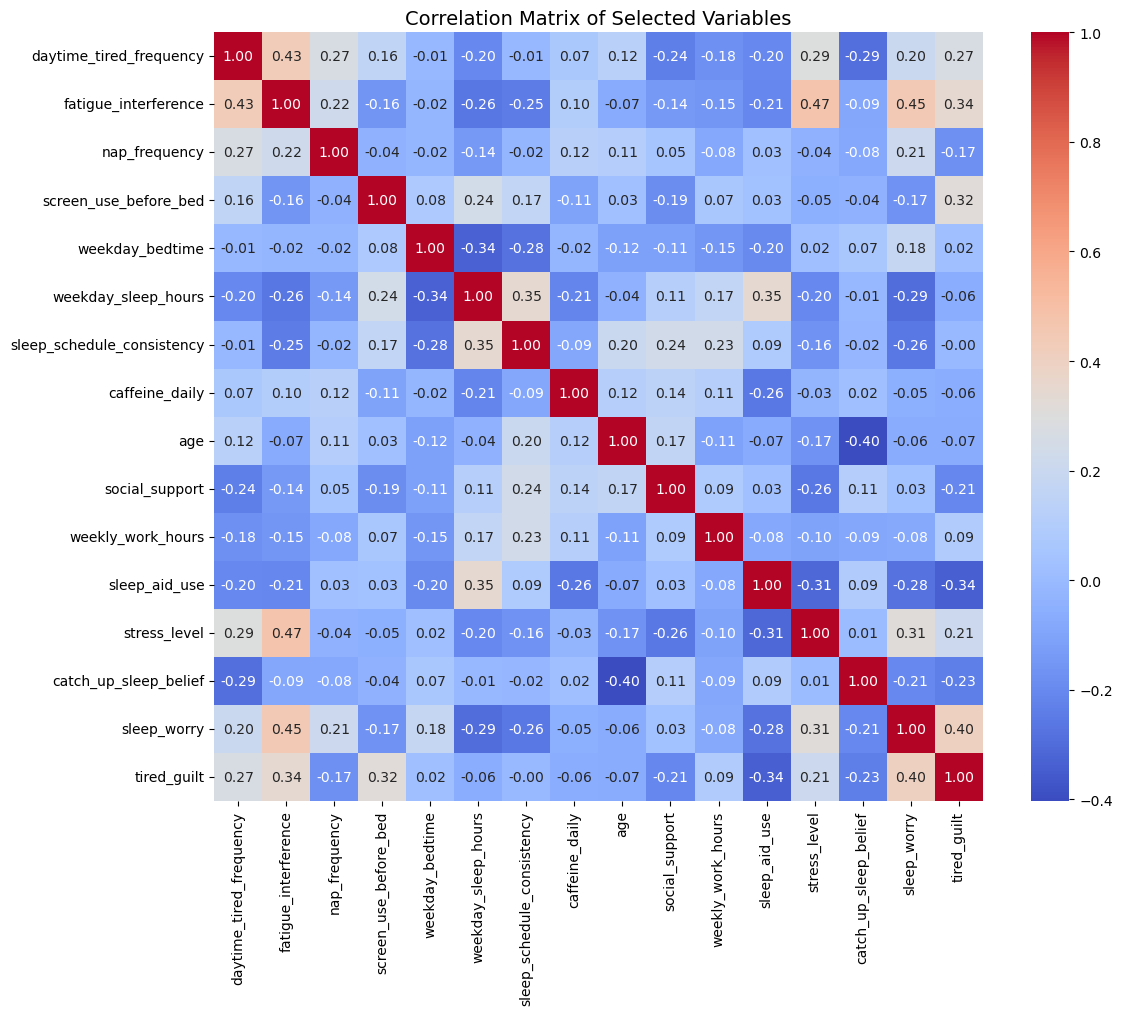

In [110]:
#| label: fig-corr-matrix
#| fig-cap: "Correlation matrix heatmap for key study variables."
#| fig-num: true

# Correlation matrix heatmap for key study variables.
corr_vars = [
    'daytime_tired_frequency',
    'fatigue_interference',
    'nap_frequency',
    'screen_use_before_bed',
    'weekday_bedtime',
    'weekday_sleep_hours',
    'sleep_schedule_consistency',
    'caffeine_daily',
    'age',
    'social_support',
    'weekly_work_hours',
    'sleep_aid_use',
    'stress_level',
    'catch_up_sleep_belief',
    'sleep_worry',
    'tired_guilt'
]

corr_matrix = final_df[corr_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Selected Variables", fontsize=14)
plt.tight_layout()
plt.show()

@fig-corr-matrix displays the correlation coefficients among key variables related to daytime fatigue, sleep, stress, and behavioral factors. The heatmap uses color gradients to represent correlation strength and direction, with red indicating positive and blue indicating negative relationships.Daytime tiredness is moderately correlated with fatigue interference (r = 0.44) and stress level (r = 0.29), while negatively correlated with social support and sleep hours.These patterns suggest that higher stress and lower social support are linked to more daytime tiredness, guiding potential model predictors and control considerations.




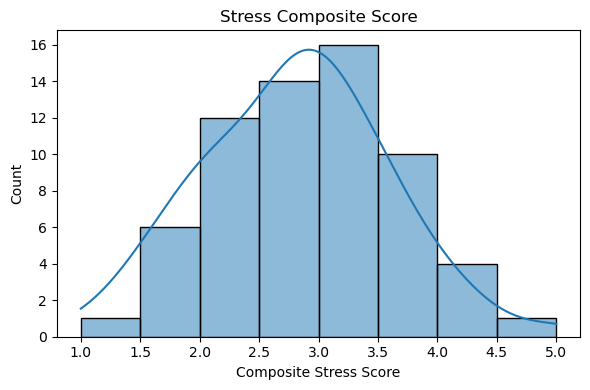

In [112]:
#| label: fig-stress-composite
#| fig-cap: "Histogram of the composite stress score combining stress level, overwhelm frequency, sleep worry, and tired guilt."
#| fig-num: true

for col in ['stress_level', 'overwhelm_frequency', 'sleep_worry', 'tired_guilt']:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')
    
# Compute mean across these columns (row-wise), skip NA if needed
final_df['stress_m'] = final_df[['stress_level', 'overwhelm_frequency', 'sleep_worry', 'tired_guilt']].mean(axis=1, skipna=True)

# Create single axes
fig, ax = plt.subplots(figsize=(6, 4))

# Stress composite score plot
sns.histplot(
    data=final_df,
    x='stress_m',
    kde=True,
    ax=ax
)
ax.set_title("Stress Composite Score")
ax.set_xlabel("Composite Stress Score")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

@fig-stress-composite illustrates the distribution of participants' composite stress scores. The distribution appears approximately normal, with a slight right skew. Most participants reported moderate stress levels, centered around scores of 2.5 to 3.5. Fewer participants reported very low (close to 1) or very high (close to 5) stress levels. This suggests that while stress is present across the sample, extreme stress is relatively uncommon. The approximate normality of this variable supports its use as a continuous moderator in subsequent analyses examining the relationship between screen use and daytime tiredness. 

In [114]:
# Frequency tables
categorical_cols = ['gender', 'ethnicity', 'sleep_aid_use']

for col in categorical_cols:
    print(f"\nFrequency table for {col}:")
    print(final_df[col].value_counts())


Frequency table for gender:
gender
2    39
1    25
Name: count, dtype: int64

Frequency table for ethnicity:
ethnicity
White    41
Black    15
Asian     4
Mixed     3
Other     1
Name: count, dtype: int64

Frequency table for sleep_aid_use:
sleep_aid_use
2    53
1    11
Name: count, dtype: int64


This set of figures presents histograms for each numeric or ordinal variable in the dataset. Each histogram shows the distribution of a single variable. These plots reveal the shape of each variable’s distribution, highlighting any skewness or outliers.


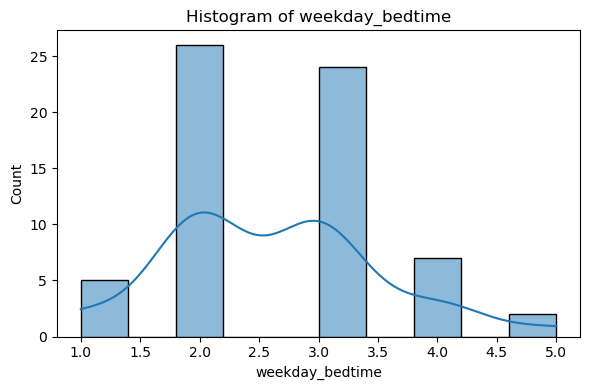

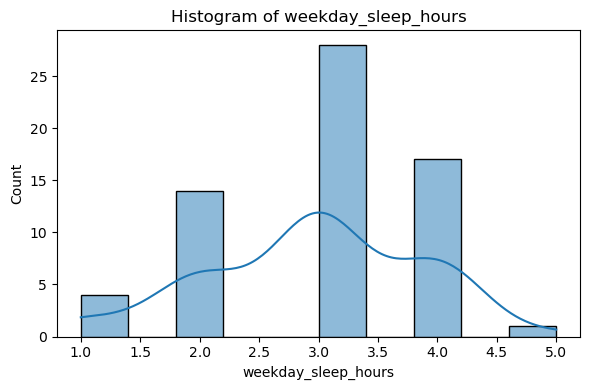

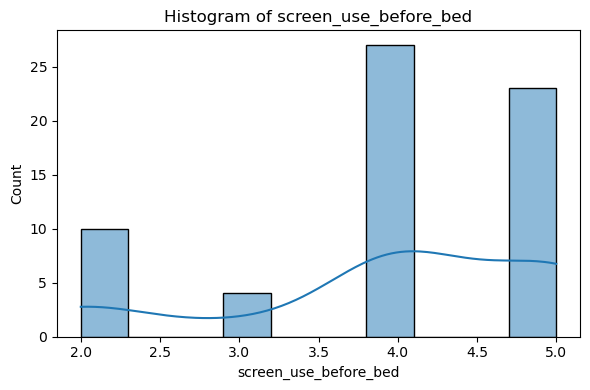

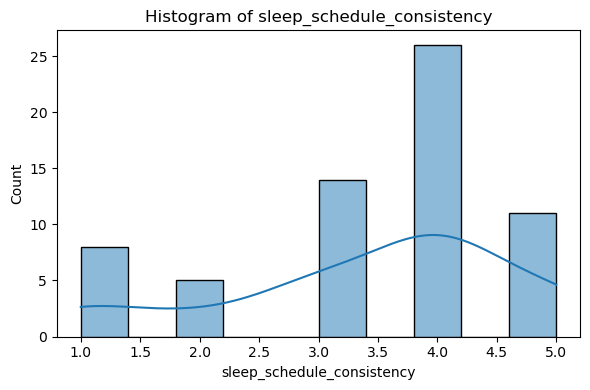

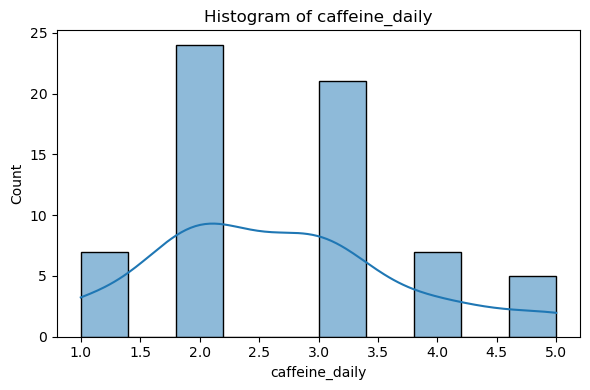

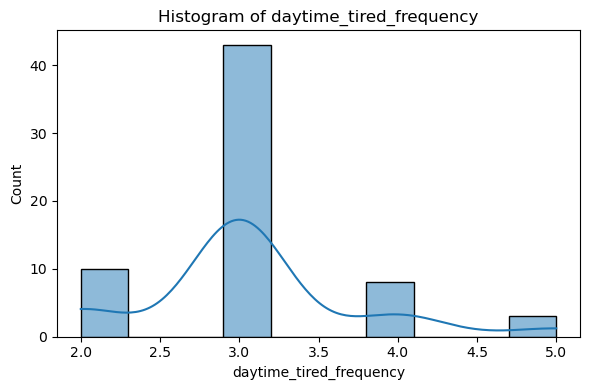

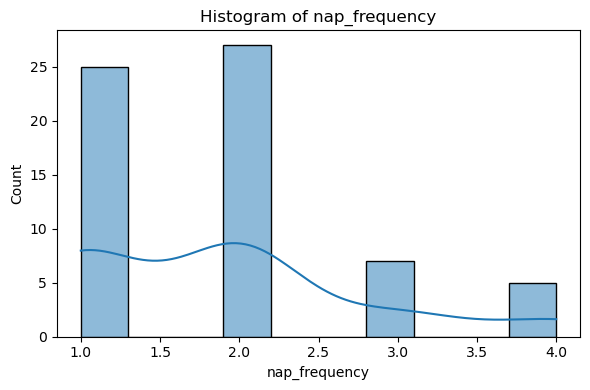

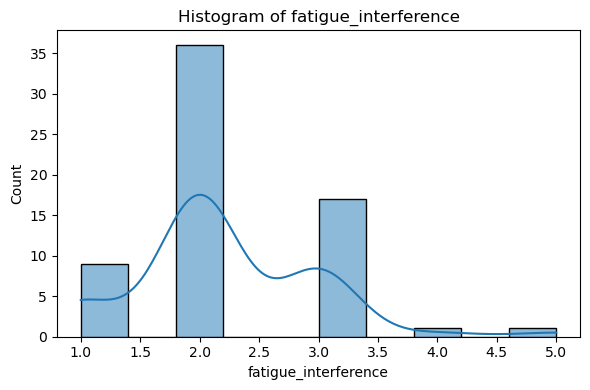

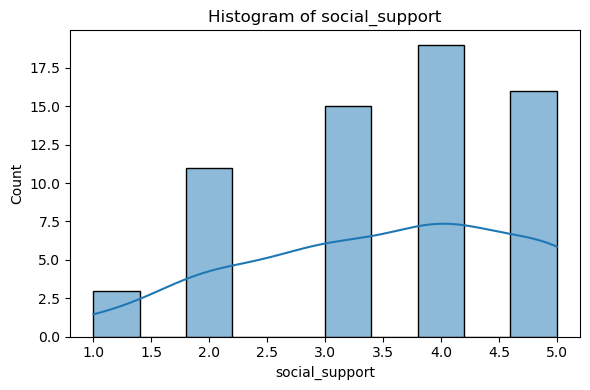

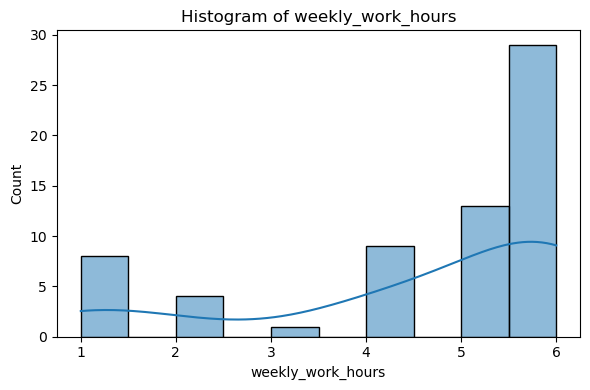

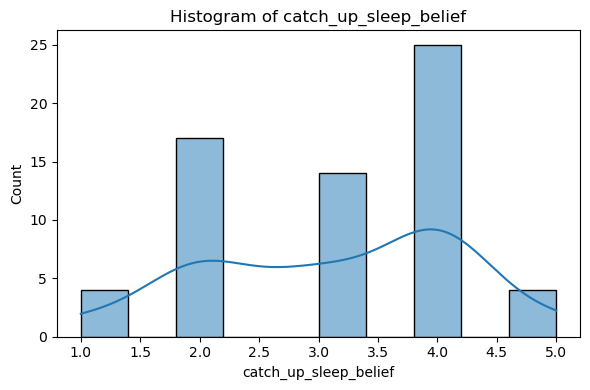

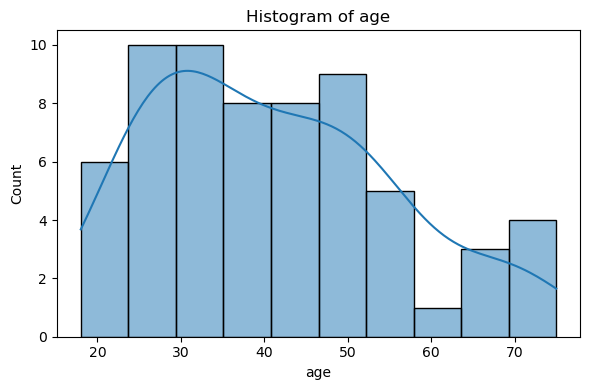

In [116]:
#| label: fig-hist-numeric
#| fig-cap: "Histograms for numeric and ordinal variables with density curves."
#| fig-num: true

# Histograms for numeric / ordinal
for col in ordinal_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(final_df[col], kde=True, bins=10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

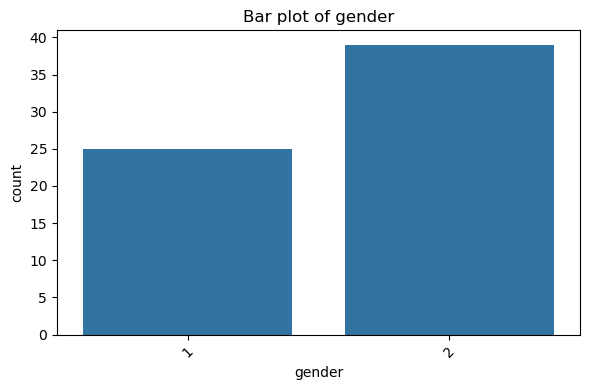

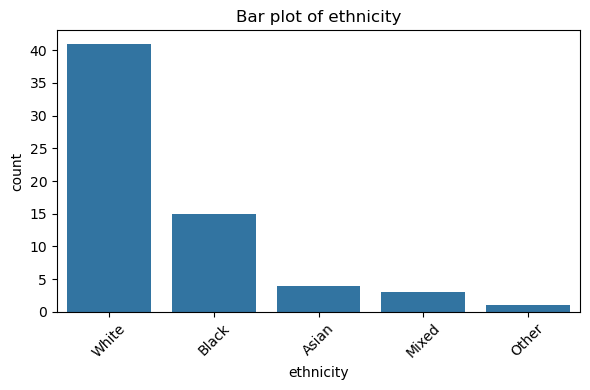

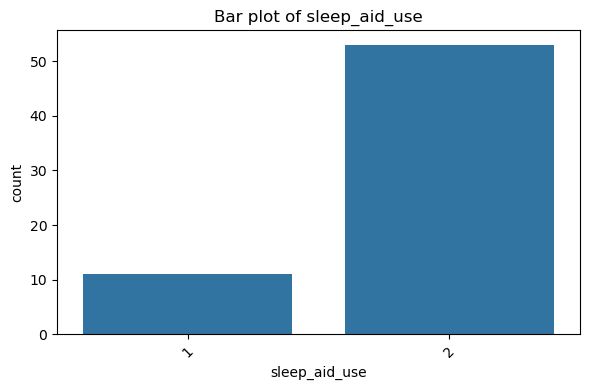

In [117]:
# Bar plots for categorical
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=final_df)
    plt.title(f"Bar plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The exploratory analysis suggests that most participants reported moderate to high screen use before bed, and a large proportion also reported moderate daytime tiredness. The correlation heatmap indicates that stress composite score and nap frequency are positively correlated with daytime tiredness, while weekday sleep hours show a slight negative relationship. The boxplot further suggests that higher screen use is associated with greater variability in daytime tiredness scores, hinting at individual differences in vulnerability. Together, these patterns highlight the importance of considering both behavioral and psychological factors in understanding daytime fatigue.


In [119]:
# Create high vs. low screen use groups
final_df['screen_group'] = pd.cut(final_df['screen_use_before_bed'], bins=[0, 3, 5], labels=['Low', 'High'])

# Compare average daytime tiredness by screen use group
group_means = final_df.groupby('screen_group')['daytime_tired_frequency'].mean()
print(group_means)


screen_group
Low     2.928571
High    3.100000
Name: daytime_tired_frequency, dtype: float64


/var/folders/3x/rt2kj8w160ndt76k0rh99dlm0000gn/T/ipykernel_63422/2101669989.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = final_df.groupby('screen_group')['daytime_tired_frequency'].mean()


Participants in the high screen use group reported slightly higher average daytime tiredness (mean = 3.10) than those in the low screen use group (mean = 2.93). This supports the idea that frequent screen use before bed may be linked to greater daytime fatigue.

# Model and result

In [122]:
# Convert selected columns to numeric type and create centered versions of predictors for modeling
numeric_cols = [
    'screen_use_before_bed',
    'weekday_bedtime',
    'weekday_sleep_hours',
    'sleep_schedule_consistency',
    'caffeine_daily',
    'nap_frequency',
    'age',
    'social_support',
    'weekly_work_hours',
    'sleep_aid_use',
    'stress_m'
]

for col in numeric_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

final_df['screen_c'] = final_df['screen_use_before_bed'] - final_df['screen_use_before_bed'].mean()
final_df['stress_c'] = final_df['stress_m'] - final_df['stress_m'].mean()
final_df['weekday_bedtime_c'] = final_df['weekday_bedtime'] - final_df['weekday_bedtime'].mean()
final_df['weekday_sleep_hours_c'] = final_df['weekday_sleep_hours'] - final_df['weekday_sleep_hours'].mean()
final_df['sleep_schedule_consistency_c'] = final_df['sleep_schedule_consistency'] - final_df['sleep_schedule_consistency'].mean()
final_df['caffeine_daily_c'] = final_df['caffeine_daily'] - final_df['caffeine_daily'].mean()
final_df['age_c'] = final_df['age'] - final_df['age'].mean()
final_df['social_support_c'] = final_df['social_support'] - final_df['social_support'].mean()
final_df['weekly_work_hours_c'] = final_df['weekly_work_hours'] - final_df['weekly_work_hours'].mean()

final_df['daytime_tired_frequency'] = pd.to_numeric(final_df['daytime_tired_frequency'], errors='coerce')
final_df['screen_x_stress'] = final_df['screen_c'] * final_df['stress_c']


In [123]:
#| label: tbl-ols-results
#| tbl-cap: "OLS regression results predicting daytime tiredness frequency from screen use, stress, their interaction, and covariates."
#| tbl-num: true


# Run the regression model
model = smf.ols(
    'daytime_tired_frequency ~ screen_c + stress_c + screen_x_stress '
    '+ weekday_bedtime_c + weekday_sleep_hours_c + sleep_schedule_consistency_c '
    '+ caffeine_daily_c + nap_frequency + age_c + social_support_c + weekly_work_hours_c '
    '+ C(gender) + C(ethnicity) + C(sleep_aid_use)',
    data=final_df
).fit()

#display summary statistics for key variables
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     daytime_tired_frequency   R-squared:                       0.472
Model:                                 OLS   Adj. R-squared:                  0.276
Method:                      Least Squares   F-statistic:                     2.415
Date:                     Fri, 15 Aug 2025   Prob (F-statistic):            0.00908
Time:                             23:09:54   Log-Likelihood:                -45.884
No. Observations:                       64   AIC:                             127.8
Df Residuals:                           46   BIC:                             166.6
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.6889      0.438      6.141      0.000       1.808       3.570
C(gender)[T.2]                  -0.1792      0.183     -0.979      0.333      -0.548       0.189
C(ethnicity)[T.Black]           -0.1370      0.412     -0.333      0.741      -0.965       0.691
C(ethnicity)[T.Mixed]           -0.3065      0.530     -0.579      0.566      -1.373       0.760
C(ethnicity)[T.Other]            0.2820      0.756      0.373      0.711      -1.241       1.805
C(ethnicity)[T.White]            0.2057      0.402      0.512      0.611      -0.604       1.015
C(sleep_aid_use)[T.2]            0.0251      0.274      0.091      0.928      -0.526       0.577
screen_c                         0.1020      0.080      1.271      0.210      -0.059       0.263
stress_c                         0.3172      0.118      2.679      0.010       0.079       0.555
screen_x_stress                  0.2257      0.131      1.725      0.091      -0.038       0.489
weekday_bedtime_c               -0.0895      0.097     -0.924      0.360      -0.285       0.105
weekday_sleep_hours_c           -0.1675      0.107     -1.562      0.125      -0.383       0.048
sleep_schedule_consistency_c     0.0753      0.075      1.011      0.317      -0.075       0.225
caffeine_daily_c                 0.0436      0.099      0.441      0.661      -0.155       0.242
nap_frequency                    0.1900      0.088      2.157      0.036       0.013       0.367
age_c                            0.0063      0.006      0.989      0.328      -0.007       0.019
social_support_c                -0.0890      0.074     -1.206      0.234      -0.237       0.059
weekly_work_hours_c             -0.0416      0.050     -0.832      0.410      -0.142       0.059
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.650
Skew:                          -0.242   Prob(JB):                        0.723
Kurtosis:                       3.096   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Stress composite score (stress_c) showed a significant positive effect (b = 0.32, p = .010), indicating that participants with higher stress levels reported more frequent daytime tiredness.
The interaction between screen use and stress (screen_x_stress) showed a marginally significant positive effect (b = 0.23, p = .091), suggesting that screen use may be more strongly related to daytime fatigue among individuals experiencing higher stress, though this result should be interpreted cautiously.
Nap frequency (nap_frequency) was a significant positive predictor (b = 0.19, p = .036), suggesting that people who nap more often may also experience greater daytime tiredness, possibly reflecting a fatigue–napping cycle.
Weekday sleep hours (weekday_sleep_hours_c) showed a negative but non-significant effect (b = –0.17, p = .125), implying that more sleep during weekdays may be linked to slightly less daytime tiredness, though this effect was not statistically significant.
Overall, the model explains a moderate proportion of variance in daytime tiredness frequency (R² = 0.56, adjusted R² = 0.28). The lower adjusted R² indicates potential overfitting, likely due to including many predictors relative to the sample size.

In [125]:
#| label: tbl-feature-importance
#| tbl-cap: "Feature importances derived from the random forest classifier predicting daytime tiredness frequency."
#| tbl-num: true


# Define X to match regression controls
X = final_df[[
    'screen_c',
    'stress_c',
    'screen_x_stress',
    'weekday_bedtime_c',
    'weekday_sleep_hours_c',
    'sleep_schedule_consistency_c',
    'caffeine_daily_c',
    'nap_frequency',
    'age_c',
    'social_support_c',
    'weekly_work_hours_c'
]].copy()

# Add categorical variables (gender, ethnicity, sleep_aid_use)
X = pd.concat([
    X,
    pd.get_dummies(final_df[['gender', 'ethnicity', 'sleep_aid_use']], drop_first=True)
], axis=1)

# Define y
y = final_df['daytime_tired_frequency'].astype(int)

# Fit random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X.fillna(0), y)

# Feature importances
importances = rf_model.feature_importances_
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance





,Feature,Importance
2,screen_x_stress,0.157925
1,stress_c,0.147183
8,age_c,0.120631
3,weekday_bedtime_c,0.097711
9,social_support_c,0.089827
5,sleep_schedule_consistency_c,0.055400
10,weekly_work_hours_c,0.050907
7,nap_frequency,0.049626
4,weekday_sleep_hours_c,0.048031
0,screen_c,0.045733


@fig-feature-importance show that the interaction between screen use and stress (screen_x_stress) was the most important factor for predicting daytime tiredness. Stress alone was also very important. Age, bedtime, and social support were also strong predictors. In contrast, screen use by itself had lower importance, suggesting that its effect depends on stress levels. Other factors like caffeine, naps, and sleep schedule had smaller effects. Ethnicity and gender had the least impact in this model. Overall, these results suggest that stress and how it interacts with screen use play a key role in daytime tiredness.

Include key results from model (e.g., feature importances from Random Forest).

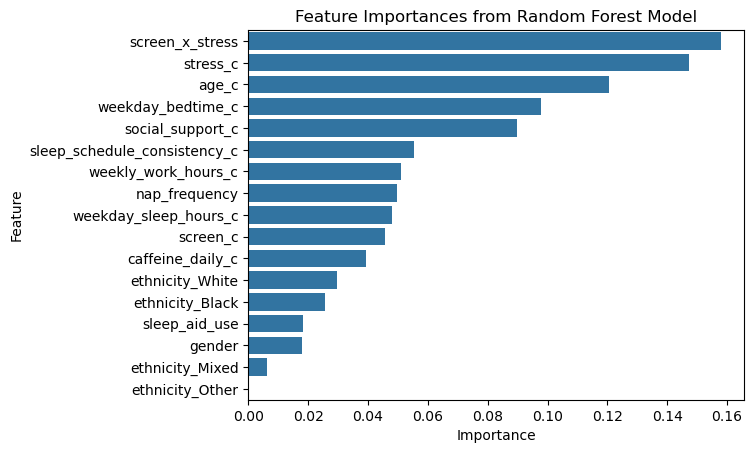

In [128]:
#| label: fig-feature-importance
#| fig-cap: "Feature importances estimated from the random forest model."
#| fig-num: true

sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title("Feature Importances from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


@fig-feature-importance shows the relative importance of key predictors from the random forest model. The plot displays the main features, with bar lengths indicating their contribution to reducing prediction error. The interaction between screen use and stress had the highest importance score, followed by stress alone as the second most important predictor. This suggests that interventions targeting stress reduction—especially in combination with managing screen use, may be most effective in reducing daytime fatigue.

## Discussion


The analysis showed that stress was significantly associated with greater daytime tiredness, supporting our hypothesis that psychological factors play a central role in daytime fatigue. Although screen use alone did not emerge as a strong predictor, the interaction between screen use and stress suggested that individuals with higher stress levels may be more vulnerable to the negative effects of nighttime screen use on daytime tiredness.

These findings highlight the importance of addressing stress management alongside sleep-related behaviors when designing interventions to reduce daytime fatigue. Promoting good sleep hygiene and reducing evening screen use may be especially beneficial for individuals experiencing high stress.

Strengths of this study include a clearly defined research question, use of multiple behavioral and psychological predictors, and detailed exploratory analyses.

Limitations include reliance on self-report measures, potential unmeasured confounders, and a relatively small sample size. Due to limited participant numbers, some categories (such as nationality) had too few cases to be included in the analysis, which may limit generalizability.

Future research could examine these relationships in larger and more diverse samples and use longitudinal designs to better assess causality. Additional objective measures, such as wearable sleep trackers, could also strengthen future studies.

# Reference